In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\razas\Downloads\CAPSTONE--2\Predicting the Price of a Football Player.csv")
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1,England,0,1,20,0,1


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    int64  
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 61.4+ KB


,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.989154,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.961143,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [4]:
df['fpl_sel'] = df['fpl_sel'].str.rstrip('%').astype(float) / 100
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,0.171,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,0.056,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,0.059,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,0.015,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.007,121,2,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.004,38,2,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.002,34,4,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.003,29,1,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,0.059,16,1,England,0,1,20,0,1


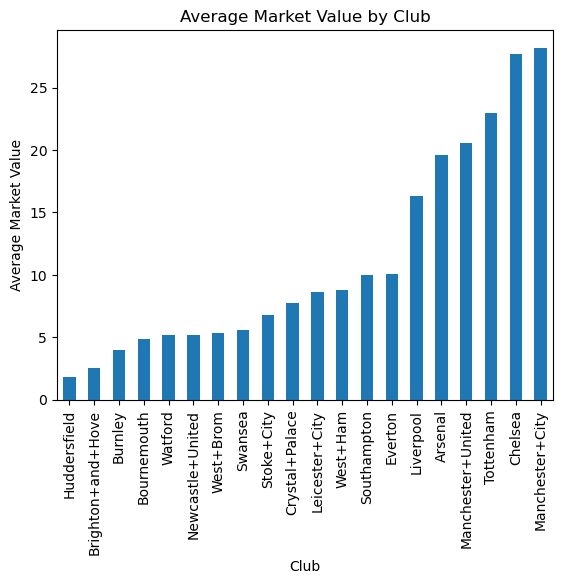

In [5]:
#Average Market Value by Club:

club_market_value = df.groupby('club')['market_value'].mean().sort_values()
club_market_value.plot(kind='bar')
plt.xlabel('Club')
plt.ylabel('Average Market Value')
plt.title('Average Market Value by Club')
plt.show()

Manchestrer+City, Chelsea and Tottenham are the top 3 clubs with highest average market value

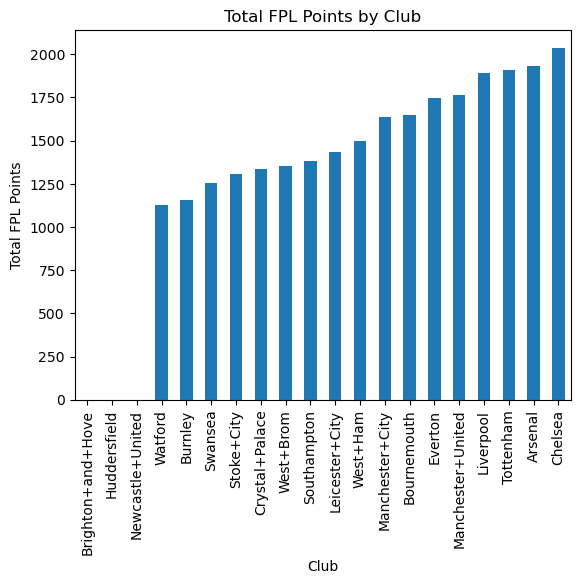

In [6]:
#Total FPL Points by Club:

club_fpl_points = df.groupby('club')['fpl_points'].sum().sort_values()
club_fpl_points.plot(kind='bar')
plt.xlabel('Club')
plt.ylabel('Total FPL Points')
plt.title('Total FPL Points by Club')
plt.show()

Chelsea Arsenal and Tottenham are the  top 3 clubs with highest FPL points

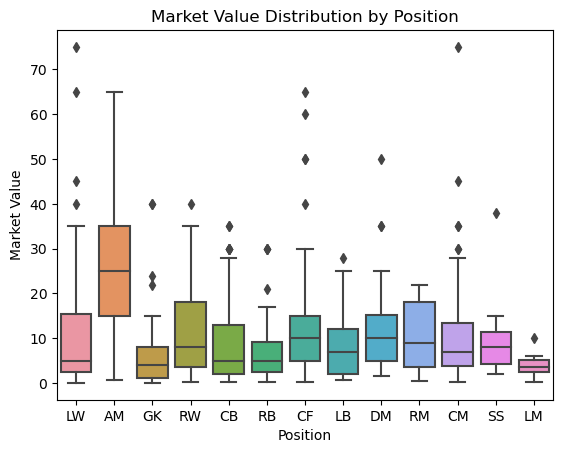

In [7]:
#Market Value Distribution by Position:

sns.boxplot(x='position', y='market_value', data=df)
plt.xlabel('Position')
plt.ylabel('Market Value')
plt.title('Market Value Distribution by Position')
plt.show()

There are some postions players whose market value is more than expected range .There market value is above the normal players market value . They might be the best players at those positions

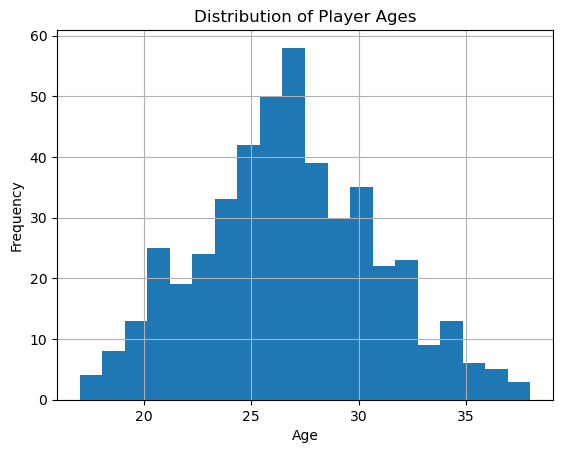

In [8]:
#Distribution of Player Ages:

df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ages')
plt.show()

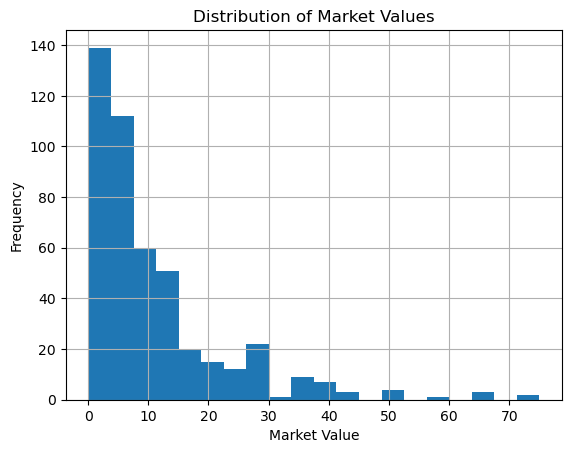

In [9]:
#Distribution of Market Values:

df['market_value'].hist(bins=20)
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.title('Distribution of Market Values')
plt.show()

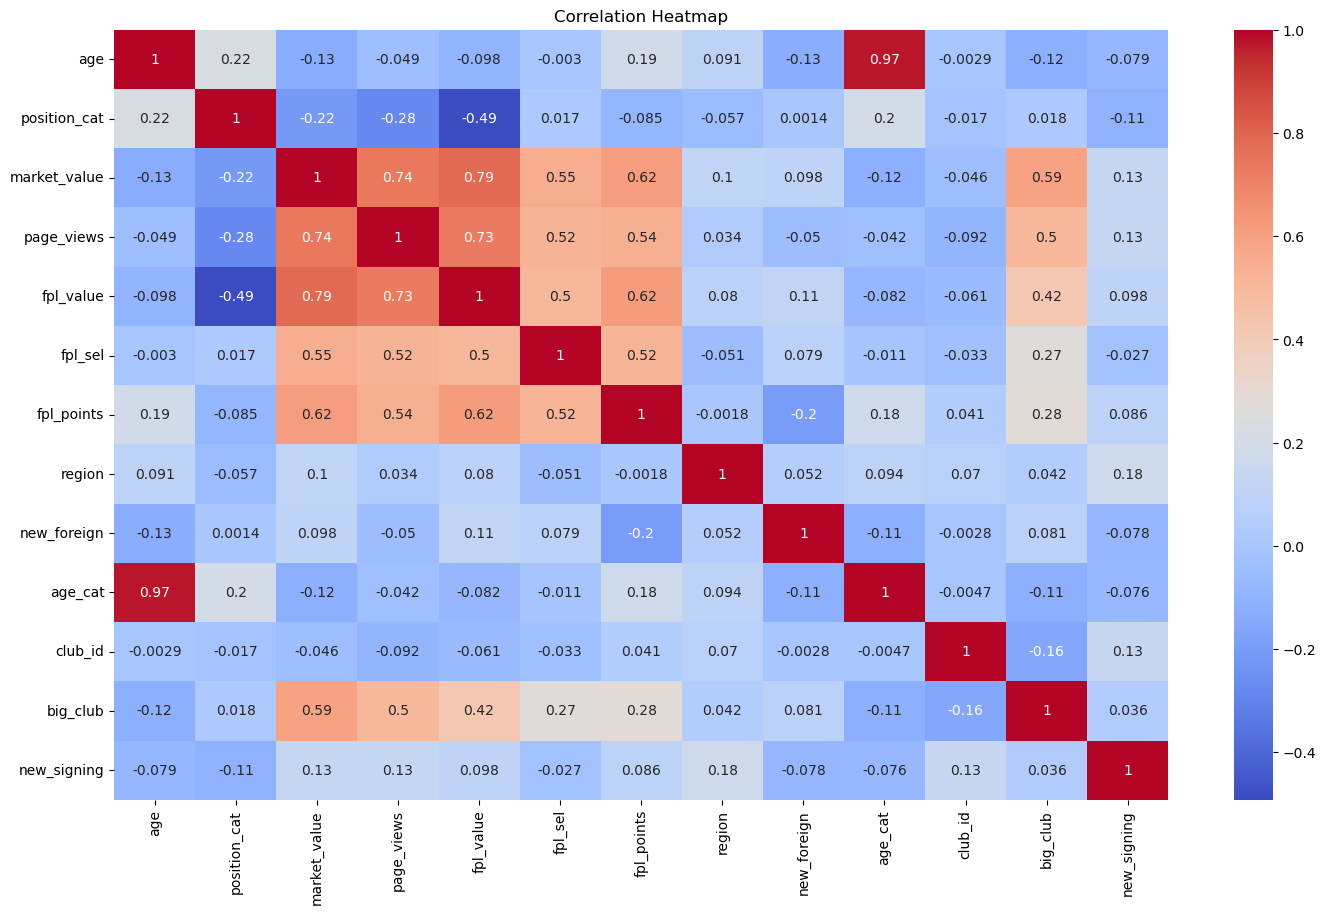

In [10]:
#Correlation Heatmap:
plt.figure(figsize=(17, 10)) 
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

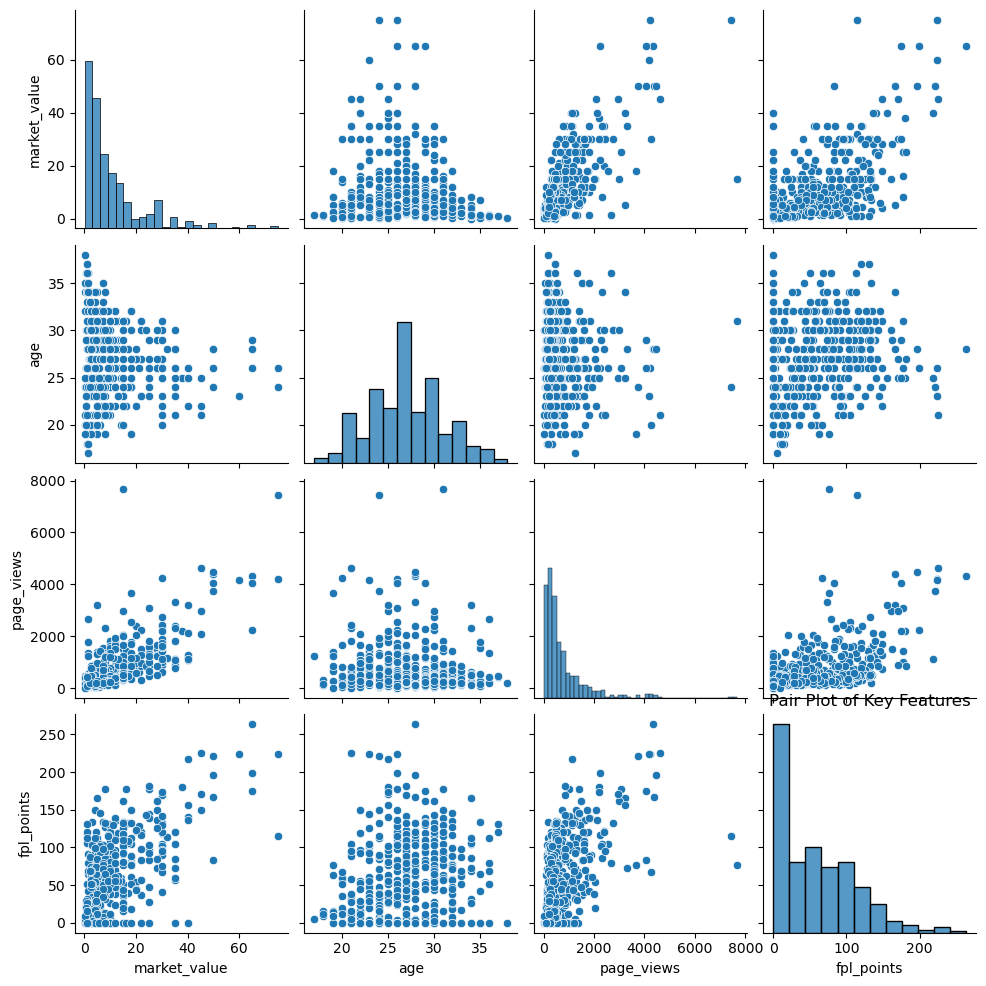

In [11]:
#Pair Plot of Key Features:

sns.pairplot(df[['market_value', 'age', 'page_views', 'fpl_points']])
plt.title('Pair Plot of Key Features')
plt.show()

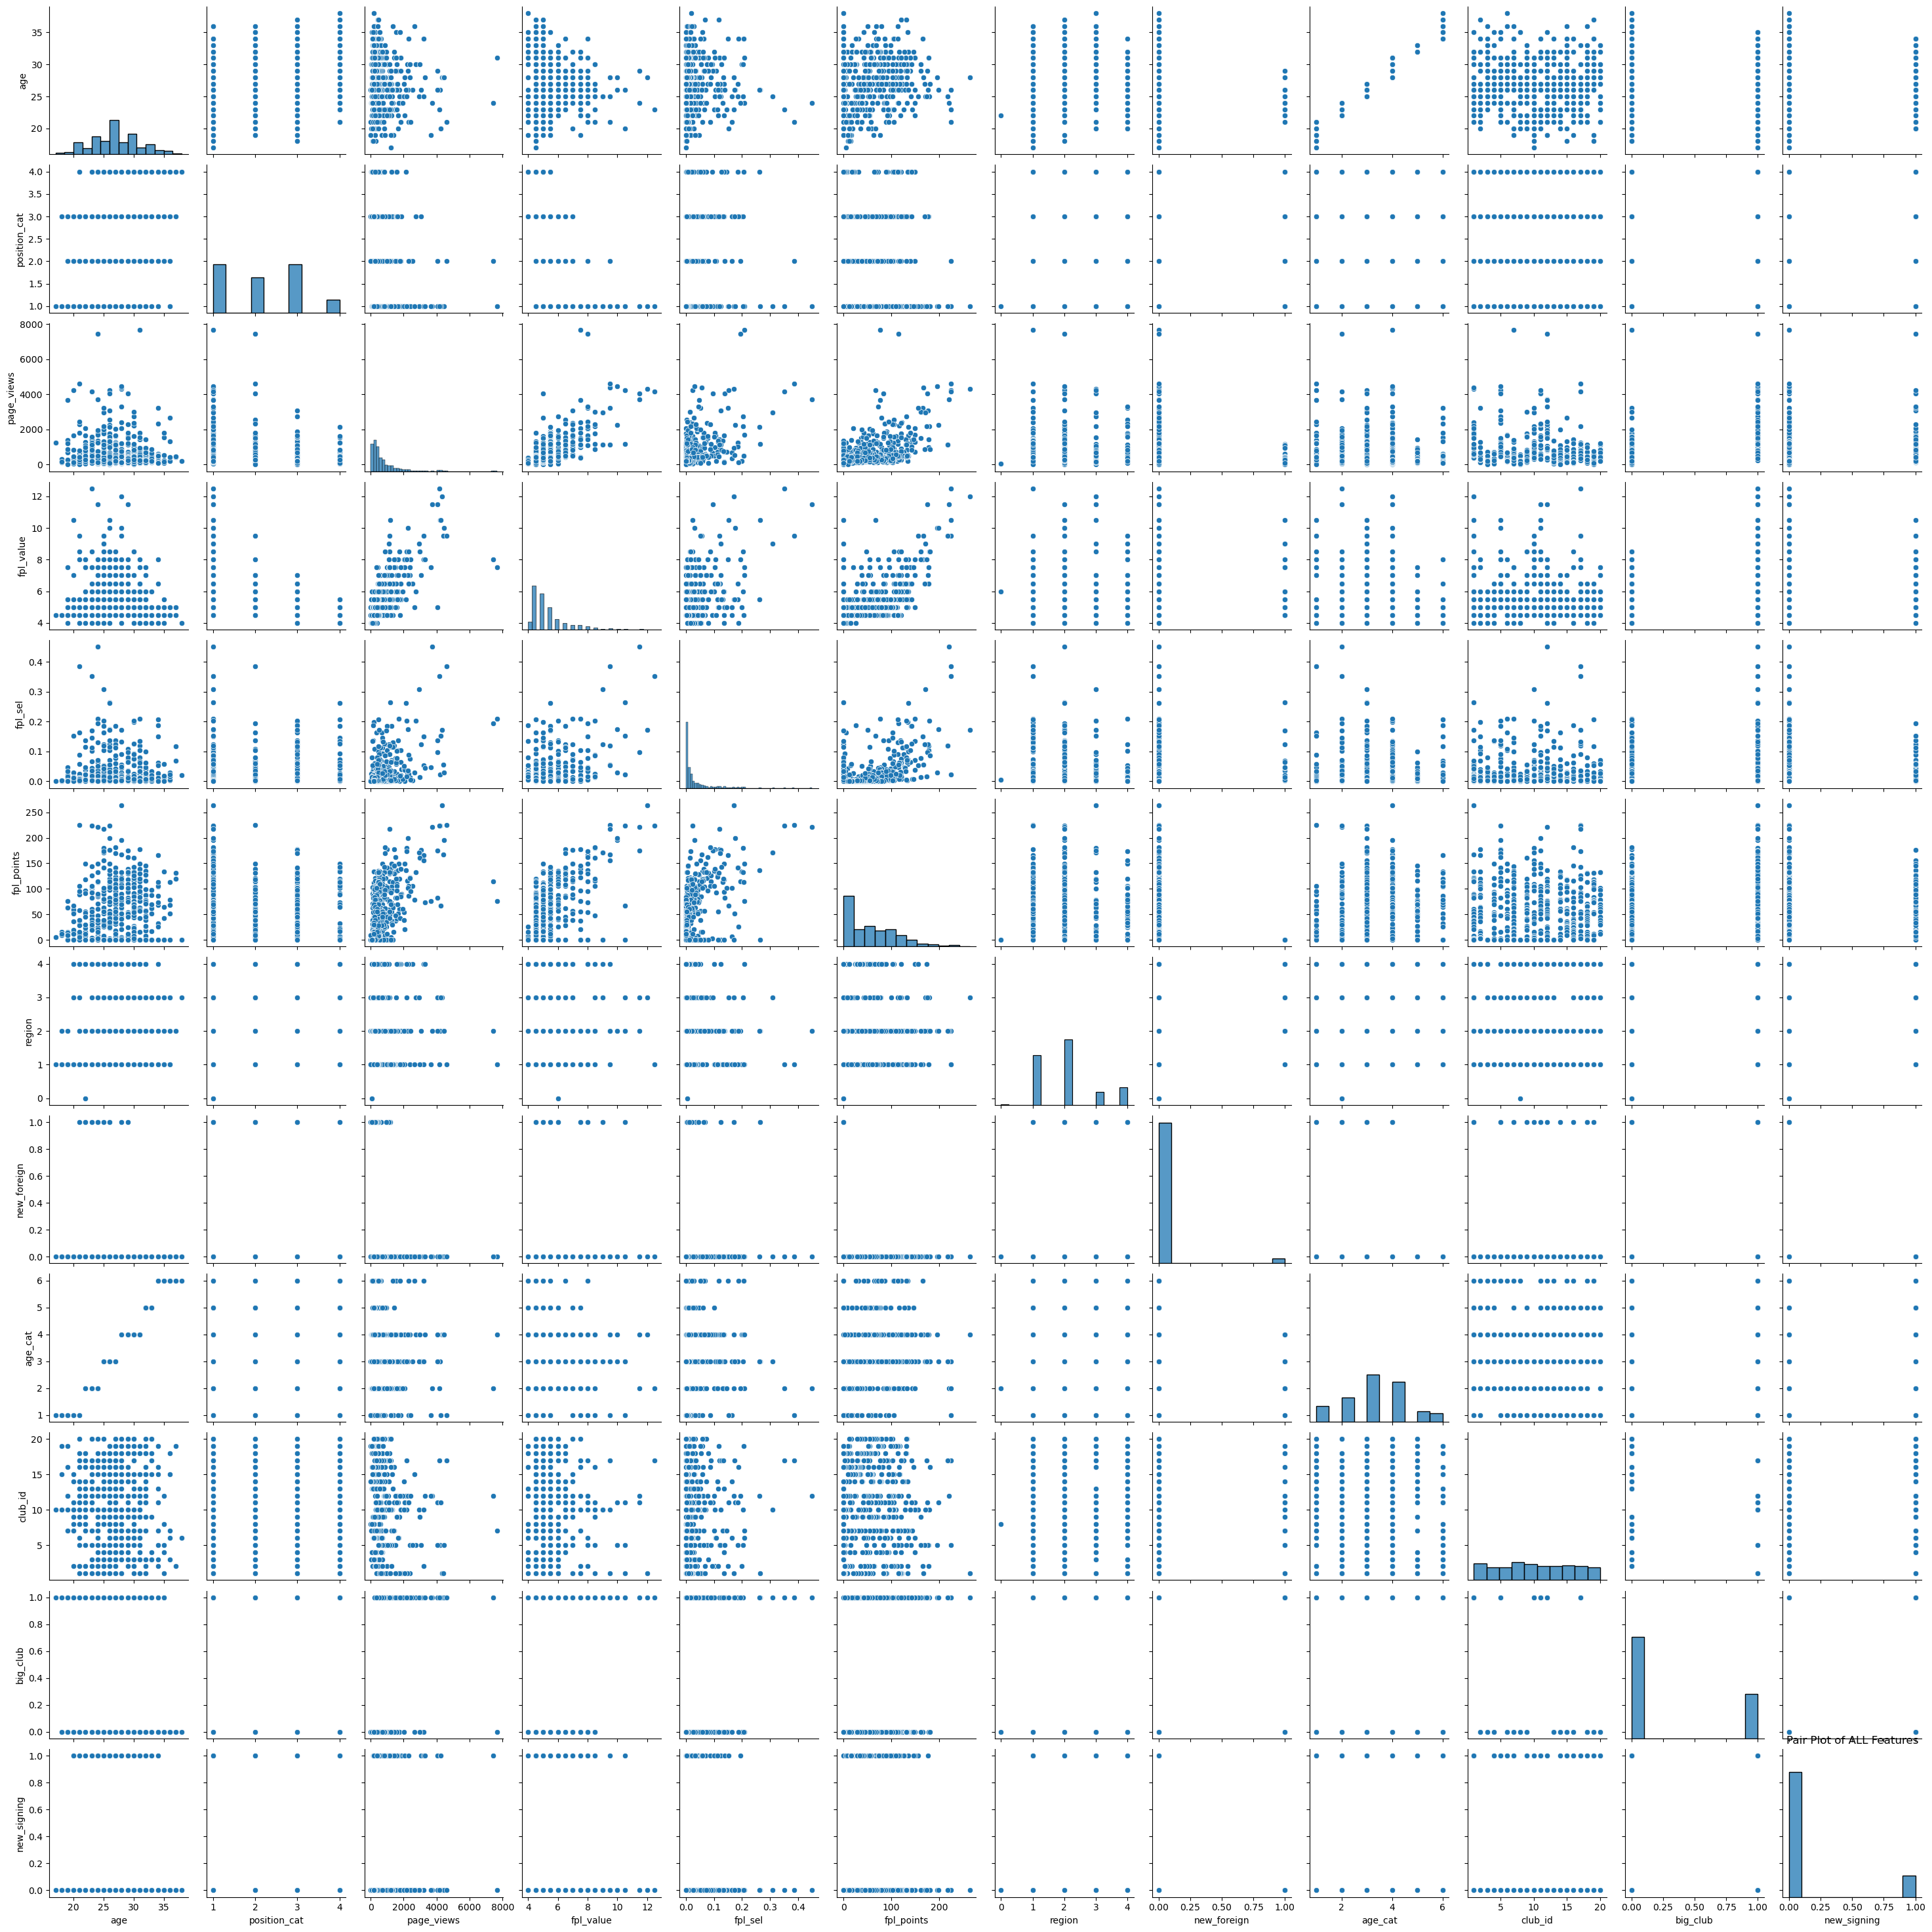

In [12]:
#Pair Plot of all Features:
pairplot_features = ['age', 'position_cat', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region', 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing']
pairplot = sns.pairplot(df[pairplot_features])
plt.title('Pair Plot of ALL Features')
plt.show()

In [13]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

categorical_features = ['club', 'position', 'nationality']
numerical_features = ['age', 'position_cat', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region', 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing']

# Separate numerical and categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Combine all features 
all_features = categorical_features + numerical_features

In [15]:
all_features

['club',
 'position',
 'nationality',
 'age',
 'position_cat',
 'page_views',
 'fpl_value',
 'fpl_sel',
 'fpl_points',
 'region',
 'new_foreign',
 'age_cat',
 'club_id',
 'big_club',
 'new_signing']

all features except dependent variable i.e market_value

In [16]:
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,0,28,8,1,65.0,4329,12.0,0.171,264,3,12,0,4,1,1,0
1,Mesut Ozil,0,28,0,1,50.0,4395,9.5,0.056,167,2,26,0,4,1,1,0
2,Petr Cech,0,35,5,4,7.0,1529,5.5,0.059,134,2,18,0,6,1,1,0
3,Theo Walcott,0,28,11,1,20.0,2393,7.5,0.015,122,1,22,0,4,1,1,0
4,Laurent Koscielny,0,31,1,3,22.0,912,6.0,0.007,121,2,25,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,19,21,3,2,5.0,288,4.5,0.004,38,2,53,0,1,20,0,1
457,Arthur Masuaku,19,23,6,3,7.0,199,4.5,0.002,34,4,14,0,2,20,0,1
458,Sam Byram,19,23,9,3,4.5,198,4.5,0.003,29,1,22,0,2,20,0,0
459,Ashley Fletcher,19,21,2,1,1.0,412,4.5,0.059,16,1,22,0,1,20,0,1


In [17]:
df.describe()

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,9.334056,26.804772,4.546638,2.180043,11.012039,763.776573,5.447939,0.032443,57.314534,1.989154,27.375271,0.034707,3.206074,10.334056,0.303688,0.145336
std,5.726475,3.961892,3.323908,1.000061,12.257403,931.805757,1.346695,0.056757,53.113811,0.961143,14.864027,0.183236,1.279795,5.726475,0.460349,0.352822
min,0.000000,17.000000,0.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,24.000000,2.000000,1.000000,3.000000,220.000000,4.500000,0.002000,5.000000,1.000000,22.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,9.000000,27.000000,4.000000,2.000000,7.000000,460.000000,5.000000,0.010000,51.000000,2.000000,22.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,14.000000,30.000000,7.000000,3.000000,15.000000,896.000000,5.500000,0.033000,94.000000,2.000000,38.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,19.000000,38.000000,12.000000,4.000000,75.000000,7664.000000,12.500000,0.450000,264.000000,4.000000,60.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [18]:
#selecing the independent and dependent variable
X = df[all_features]
Y = df['market_value']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(X)
df = scaler.transform(X)

In [20]:
from sklearn.model_selection import train_test_split 
## split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,
                                                random_state=10)


# Applying Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model object
lm = LinearRegression()

# Train the Linear Regression model
lm.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = lm.predict(X_test)
print("Predicted values:", Y_pred)



# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 

Predicted values: [ 6.89912195e+00  1.38661240e+01  2.49192908e+01  1.26168547e+01
  5.83688429e+01  1.07975405e+01  1.14469072e+01  1.57075314e+01
  7.99026179e+00  5.55383406e+00  7.26616951e+00  3.37908246e+00
  5.53427826e+00  1.00385533e+01  1.65995974e+01  7.54955780e+00
  1.26500078e+01  2.16963886e+01 -1.11464871e+00  1.66233069e+00
  1.93290880e+00  1.19309115e+01  7.41890196e+00  9.89331347e-02
  1.28019437e+00  2.49572410e+00  1.47688550e+01  2.37272215e+00
  1.75657788e+01  1.47435730e+01  1.42275114e+01  1.75291666e+01
  1.73563771e+00  2.93602686e+00  2.93242089e+01  8.80726908e-01
  4.34816089e+01  3.48303889e+00  2.76886654e+01  6.88587279e-01
  4.49067270e+00  6.36905428e+00  1.43128727e+01  4.34616803e+01
  4.45227861e+00  1.79232589e+01  2.31662504e+00  1.45347113e+00
  1.84440115e+01  3.60851532e+00  1.93732500e+01  5.78870011e+00
  3.72036411e+00  3.53512803e+00  6.71978708e+00  1.36300160e+01
  2.36668028e+00  3.74238843e-03 -1.05103728e+00  1.71502670e+01
  1.179

we do not see any significant change in accuracy score when we applied ridge and lasso regularization techniques

# Applying Ridge Regression

In [22]:
from sklearn.linear_model import Ridge


# Create a Ridge regression model object
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Train the Ridge model
ridge.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = ridge.predict(X_test)



# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 

R-squared: 0.7769554889051173
RMSE: 5.633024645767721
Adj R-square: 0.7694371345985482


# Applying Lasso Regression

In [23]:
from sklearn.linear_model import Lasso


# Create a Lasso regression model object
lasso = Lasso(alpha=1.0) #adjust the alpha

# Train the Lasso model
lasso.fit(X_train, Y_train)

# Make predictions
Y_pred = lasso.predict(X_test)



# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7101170280374715
RMSE: 6.421806773528051
Adj R-square: 0.7003456919039031


# Applying Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor with the correct parameters
DecisionTree = DecisionTreeRegressor(random_state=10, criterion="absolute_error", splitter='best')

# Fit the model on the training data
DecisionTree.fit(X_train, Y_train)

# Predict on the test data
Y_pred = DecisionTree.predict(X_test)

# Print the true vs predicted values
print(list(zip(Y_test, Y_pred)))


# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 




[(3.5, 1.25), (14.0, 10.0), (40.0, 24.0), (8.0, 22.0), (50.0, 60.0), (15.0, 10.0), (6.0, 15.0), (10.0, 20.0), (7.0, 6.0), (5.5, 0.25), (5.0, 7.0), (6.0, 8.0), (5.0, 1.5), (1.5, 7.0), (25.0, 7.0), (15.0, 12.0), (18.0, 13.0), (25.0, 18.0), (1.5, 1.0), (2.5, 1.5), (6.0, 1.25), (12.0, 10.0), (1.0, 4.0), (5.0, 12.0), (0.25, 0.75), (2.0, 0.5), (8.0, 15.0), (5.5, 10.0), (15.0, 30.0), (15.0, 17.0), (13.0, 12.0), (18.0, 10.0), (2.5, 1.0), (12.0, 5.0), (22.0, 5.0), (0.5, 3.0), (65.0, 40.0), (8.0, 15.0), (30.0, 15.0), (2.0, 3.0), (5.0, 1.5), (7.0, 3.5), (12.0, 20.0), (50.0, 75.0), (10.0, 5.0), (35.0, 30.0), (5.0, 12.0), (2.0, 1.5), (35.0, 28.0), (1.5, 3.0), (16.0, 22.0), (5.0, 8.0), (2.0, 0.1), (1.5, 1.25), (5.0, 5.0), (10.0, 7.0), (2.0, 3.0), (2.0, 0.25), (1.0, 2.0), (21.0, 20.0), (1.0, 12.0), (1.0, 8.0), (1.0, 0.25), (0.5, 0.5), (9.0, 15.0), (0.75, 0.75), (9.0, 6.0), (8.0, 5.0), (15.0, 7.0), (10.0, 30.0), (0.25, 2.0), (6.0, 2.5), (0.65, 1.75), (1.0, 5.0), (17.0, 9.0), (10.0, 4.5), (2.5, 5.5), (

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor with the correct parameters
DecisionTree = DecisionTreeRegressor(random_state=42,criterion ='absolute_error', max_depth= 10, max_features = 'auto',
                                     min_samples_leaf= 4, min_samples_split= 10, splitter= 'random')

# Fit the model on the training data
DecisionTree.fit(X_train, Y_train)

# Predict on the test data
Y_pred = DecisionTree.predict(X_test)

# Print the true vs predicted values
print(list(zip(Y_test, Y_pred)))


# Evaluate the model performance
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 



[(3.5, 8.0), (14.0, 15.0), (40.0, 13.0), (8.0, 18.0), (50.0, 45.0), (15.0, 5.5), (6.0, 7.0), (10.0, 30.0), (7.0, 4.5), (5.5, 10.0), (5.0, 9.0), (6.0, 9.0), (5.0, 6.0), (1.5, 5.25), (25.0, 14.0), (15.0, 5.25), (18.0, 13.0), (25.0, 13.0), (1.5, 0.25), (2.5, 1.5), (6.0, 7.0), (12.0, 15.0), (1.0, 1.0), (5.0, 5.0), (0.25, 0.25), (2.0, 1.0), (8.0, 7.0), (5.5, 5.5), (15.0, 15.0), (15.0, 15.0), (13.0, 30.0), (18.0, 20.0), (2.5, 3.0), (12.0, 4.5), (22.0, 28.0), (0.5, 2.5), (65.0, 65.0), (8.0, 5.0), (30.0, 30.0), (2.0, 3.0), (5.0, 3.0), (7.0, 7.0), (12.0, 13.0), (50.0, 28.0), (10.0, 9.0), (35.0, 30.0), (5.0, 0.5), (2.0, 1.5), (35.0, 30.0), (1.5, 3.0), (16.0, 2.0), (5.0, 5.0), (2.0, 1.0), (1.5, 2.5), (5.0, 2.5), (10.0, 15.0), (2.0, 5.0), (2.0, 1.5), (1.0, 1.0), (21.0, 30.0), (1.0, 0.5), (1.0, 1.0), (1.0, 0.25), (0.5, 1.0), (9.0, 8.0), (0.75, 1.0), (9.0, 8.0), (8.0, 3.0), (15.0, 26.5), (10.0, 15.0), (0.25, 1.0), (6.0, 2.75), (0.65, 5.5), (1.0, 6.0), (17.0, 15.0), (10.0, 15.0), (2.5, 3.0), (1.5, 1.

# Tuning the Decision Tree

In [26]:
from sklearn.model_selection import GridSearchCV


# Define the model
decision_tree = DecisionTreeRegressor(random_state=10)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['poisson', 'friedman_mse', 'absolute_error', 'squared_error', 'mae'],
    'splitter': ['best', 'random']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)



# Evaluate on test data
Y_pred = grid_search.best_estimator_.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 



Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best R-squared Score: 0.6484091569682204
R-squared: 0.7204169783864225
RMSE: 6.306687012629437
Adj R-square: 0.7109928315904592


# Applying Random Forest Regressor

In [27]:
# predicting using the decision_Tree_c 
from sklearn.ensemble import RandomForestRegressor

Random_forest = RandomForestRegressor(n_estimators=200, random_state=10, max_depth=20, min_samples_leaf=1)
Random_forest.fit(X_train,Y_train)

#fit the modal on the data and predict the values 
Y_pred=Random_forest.predict(X_test)
print(Y_pred)


# Evaluate the model
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 


[ 5.8725  11.11    28.545   16.23125 54.74     8.588    9.5805  17.725
  5.3975   4.53375  6.813    6.78275  8.83    10.2775  14.905    6.8625
  9.2775  23.04     2.18     1.655    3.21775 10.95     3.93375  3.02125
  0.69675  3.21625 12.755    6.44675 18.28    13.8675  14.615   17.1075
  2.51375  5.84625 26.62     1.788   40.455    6.874   23.125    3.1425
  5.28025  6.76    16.025   53.505    8.065   21.385    0.8975   0.95
 21.515    3.2525  14.505    7.5305   3.95825  2.30625  4.99875 12.4375
  4.78125  1.3365   2.77325 19.65     3.70625  5.2575   1.7865   1.01625
 10.705    3.275    7.165    4.9475  21.1425  17.44     2.4705   8.14125
  2.2625   6.72525 11.955   13.31625  4.468    7.1      3.59625 28.42
 17.0525   9.9875  18.1525   6.1975   7.595    3.38375  4.8175   7.1
  2.6025   4.686    7.63125  1.39125  5.9875 ]
R-squared: 0.8239022436785257
RMSE: 5.0052156360312825
Adj R-square: 0.8179663642519592


# Tuning the Random Forest Regressor 

In [28]:
# Define the Random Forest Regressor model
random_forest = RandomForestRegressor(random_state=10)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# Setup GridSearchCV with the defined model, parameter grid, and evaluation criteria
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to find the best parameters using training data
grid_search.fit(X_train, Y_train)

# Print the best parameters found by GridSearchCV and the best R-squared score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

# Evaluate the best model on the test data
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and print R-squared, RMSE, and Adjusted R-squared on the test set
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R-squared Score: 0.7905762619245731
R-squared: 0.8486476781281455
RMSE: 4.640239804610867
Adj R-square: 0.8435459144695436


Best Algorithm for the problem with highest accuracy after tuning is 84.86%

# Applying K-Nearest Neighbor(KNN) Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNeighborsRegressor model object
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the KNN model
knn.fit(X_train, Y_train)

# Make predictions
Y_pred = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5960380767693223
RMSE: 7.580818465189002
Adj R-square: 0.5824213827278388


# Applying Support Vector Regressor

In [30]:
from sklearn.svm import SVR

# Create SVR model object
svr = SVR(kernel='rbf')  # RBF kernel is commonly used for SVR

# Train SVR model
svr.fit(X_train, Y_train)

# Predict on the test set
Y_pred = svr.predict(X_test)




from sklearn.metrics import r2_score, mean_squared_error

# Evaluate the model performance
r2 = r2_score(Y_test, Y_pred)  # Calculate R-squared
print("R-squared:", r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  # Calculate RMSE
print("RMSE:", rmse)

adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 


R-squared: 0.46838362403956846
RMSE: 8.69651111896244
Adj R-square: 0.4504639709173067


# Conclusion

Random Forest Regressor is the best regressor algorithm for the problem with highest accuracy score = 84.86% after tuning 

# Graph of Actual Market Value v/s Predicted Market Value

In [33]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual Market Value"]=Y_test
new_df["Predicted Market Value"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

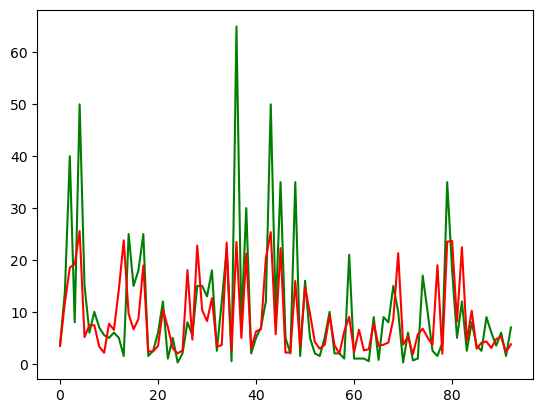

In [44]:
 
new_df["Actual Market Value"].plot(color='green')
new_df["Predicted Market Value"].plot(color='red')
plt.show()

# Code for Deployment

In [52]:
ngrok.set_auth_token("2jheEaYdmUuaoRY5H97Oj6sB4Pa_MB51NsGSPNyUoMRiT9Gy")

In [57]:
# Import necessary libraries
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train and Y_train are already defined
# Example:
# X_train = pd.DataFrame({...})
# Y_train = pd.Series([...])

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, Y_train)

# Save the model and scaler to disk
with open('regressor_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [58]:
# Create the Streamlit app script
with open('app.py', 'w') as f:
    f.write('''
import pickle
import pandas as pd
import streamlit as st

# Load your trained model
with open('regressor_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

def predict_value(input_data):
    # Assume input_data is a dictionary of features
    df = pd.DataFrame([input_data])
    scaled_data = scaler.transform(df)
    prediction = model.predict(scaled_data)
    return prediction[0]

# Streamlit interface
st.title('Value Prediction')
st.write("Enter the details to predict the value:")

# Collect user input
input_data = {}
input_data['club'] = st.number_input('Club', min_value=0, max_value=19, value=9)
input_data['age'] = st.number_input('Age', min_value=17, max_value=38, value=26)
input_data['position'] = st.number_input('Position', min_value=0, max_value=12, value=4)
input_data['position_cat'] = st.number_input('Position Category', min_value=1, max_value=4, value=2)
input_data['market_value'] = st.number_input('Market Value', min_value=0.05, max_value=75000000.0, value=1100000.0, step=100000.0)
input_data['page_views'] = st.number_input('Page Views', min_value=3, max_value=7664, value=764)
input_data['fpl_value'] = st.number_input('FPL Value', min_value=4, max_value=13, value=6)
input_data['fpl_sel'] = st.number_input('FPL Selection', min_value=0, max_value=1000, value=34)
input_data['fpl_points'] = st.number_input('FPL Points', min_value=0, max_value=264, value=51)
input_data['region'] = st.number_input('Region', min_value=0, max_value=4, value=2)
input_data['nationality'] = st.number_input('Nationality', min_value=0, max_value=60, value=27)
input_data['new_foreign'] = st.selectbox('New Foreign', [0, 1])
input_data['age_cat'] = st.number_input('Age Category', min_value=1, max_value=3, value=2)
input_data['club_id'] = st.number_input('Club ID', min_value=1, max_value=20, value=10)
input_data['big_club'] = st.selectbox('Big Club', [0, 1])
input_data['new_signing'] = st.selectbox('New Signing', [0, 1])

# Predict and display result
if st.button('Predict'):
    result = predict_value(input_data)
    st.write(f'Predicted Value: {result}')
''')


In [60]:
# Install Streamlit and pyngrok if you haven't already
!pip install streamlit pyngrok

from pyngrok import ngrok
import subprocess

# Set your ngrok authtoken (replace with your actual ngrok authtoken)
ngrok.set_auth_token("2jheEaYdmUuaoRY5H97Oj6sB4Pa_MB51NsGSPNyUoMRiT9Gy")  # Replace with your actual ngrok authtoken

# Run the Streamlit app in the background
command = 'streamlit run app.py'
process = subprocess.Popen(command.split())

# Open a tunnel on the default Streamlit port 8501
public_url = ngrok.connect(8501)
print(f'Streamlit app is live at: {public_url}')

# Access the public URL
public_url


Streamlit app is live at: NgrokTunnel: "https://3098-45-248-66-132.ngrok-free.app" -> "http://localhost:8501"


<NgrokTunnel: "https://3098-45-248-66-132.ngrok-free.app" -> "http://localhost:8501">

t=2024-07-24T23:49:23+0530 lvl=warn msg="failed to open private leg" id=27cdf519264b privaddr=localhost:8501 err="dial tcp [::1]:8501: connectex: No connection could be made because the target machine actively refused it."
t=2024-07-24T23:49:24+0530 lvl=warn msg="failed to open private leg" id=8ba53a6652a7 privaddr=localhost:8501 err="dial tcp [::1]:8501: connectex: No connection could be made because the target machine actively refused it."


In [62]:
# Install Streamlit and pyngrok if you haven't already
!pip install streamlit pyngrok

from pyngrok import ngrok
import subprocess

# Set your ngrok authtoken (replace with your actual ngrok authtoken)
ngrok.set_auth_token("2jheEaYdmUuaoRY5H97Oj6sB4Pa_MB51NsGSPNyUoMRiT9Gy")  # Replace with your actual ngrok authtoken

# Run the Streamlit app in the background
command = 'streamlit run app.py'
process = subprocess.Popen(command.split())

# Open a tunnel on the default Streamlit port 8501
public_url = ngrok.connect(8501)
print(f'Streamlit app is live at: {public_url}')

# Access the public URL
public_url


t=2024-07-24T23:55:28+0530 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=f57114af616c0ba4 err="failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2jhhEbM4ySVZdLAcICzyMSQzgoW, tn_2jhhJZHMBKi5sg4CJDTS8aiRLrF, tn_2jhi3rlsBVn9iFZQxwnO8mHlGfz\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2jhhEbM4ySVZdLAcICzyMSQzgoW, tn_2jhhJZHMBKi5sg4CJDTS8aiRLrF, tn_2jhi3rlsBVn9iFZQxwnO8mHlGfz\n\r\n\r\nERR_NGROK_324\r\n"}}
